### Experimento 3

#### Ubicación
* **Latitud:**
* **Longitud:**
* **Altura:**
* **Descripción:** La prueba se realizo en el barrio comuneros, en el edificio Loft 9, apt 411. Unicamente se uso la estación *outdoor* ubicada cerca a la venta, como se puede ver en la imagen.

<center><img src="img.jpeg" width=20%></center>

#### Objetivo
Explorar el comportamiento de las mediciones en función de los estados de la ventana *abierto*, *cerrado*, lo que equivandría a si hay o no un flujo de aire. 

#### Concideraciones
Las mediciones se verán afectas por las actividades desarrolladas en la casa durante esos días, cocinar, hacer aseo, colgar roba cerca a la estación, cerrar la cortina... lo ideal sería poder identificar cuando se cerro o abrio la ventana apartir de las mediciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import numpy
import itertools

#importa configuracion
import os,sys
sys.path.append("../")
from common import config, get_medicion

In [2]:
config_ = config(os.getcwd().replace("\\",'/'))
start = config_['date_init']
end = config_['date_end']

outdoor =pd.read_csv("../../../outdoor.csv")

outdoor['fecha_hora_med'] = pd.to_datetime(outdoor['fecha_hora_med'])
outdoor.index = outdoor['fecha_hora_med']
outdoor.resample('1Min', closed='right').mean()

outdoor = outdoor.loc[start: end]

..\common.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  __config = yaml.load(f)


Text(0.5, 1.0, 'RESISTENCIA Zero')

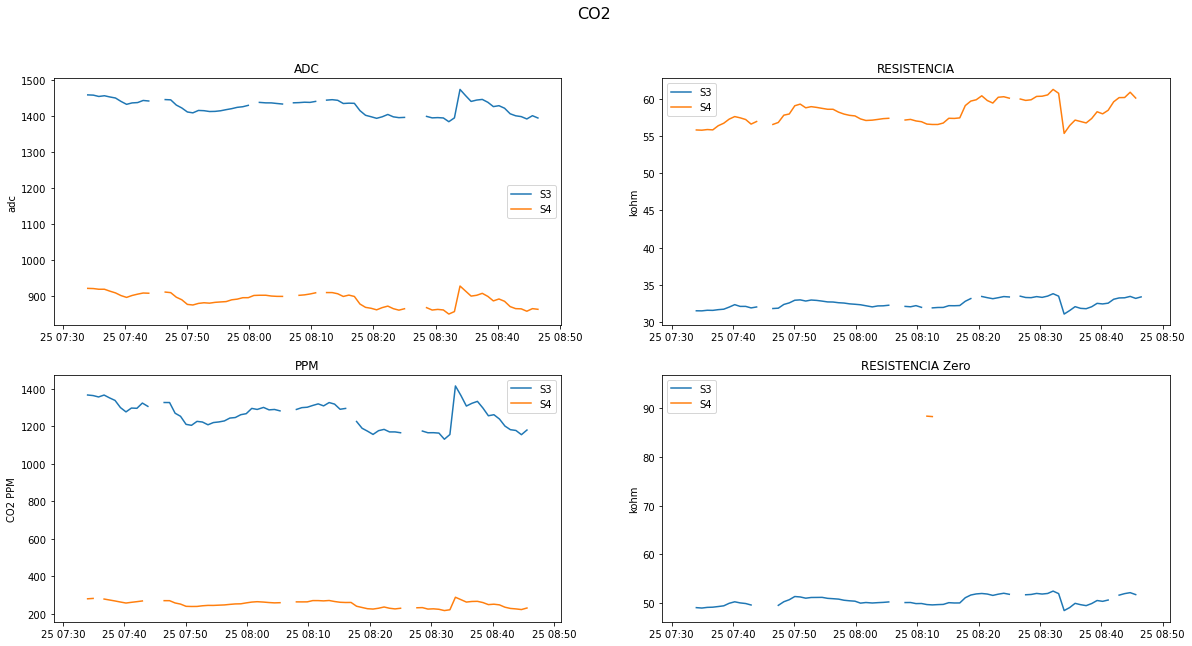

In [3]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(20,10)
fig.suptitle('CO2', fontsize=16)

axs[0, 0].plot(outdoor["co2_adc_1"], label = 'S3')
axs[0, 0].plot(outdoor["co2_adc_2"], label = 'S4')
axs[0, 0].set( ylabel='adc')
axs[0, 0].legend(fontsize = 10)
axs[0, 0].set_title('ADC')

axs[0, 1].plot(outdoor["co2_res_1"], label = 'S3')
axs[0, 1].plot(outdoor["co2_res_2"], label = 'S4')
axs[0, 1].set( ylabel='kohm')
axs[0, 1].legend(fontsize = 10)
axs[0, 1].set_title('RESISTENCIA' )


axs[1, 0].plot(outdoor["co2_ppm_1"], label = 'S3')
axs[1, 0].plot(outdoor["co2_ppm_2"], label = 'S4')
axs[1, 0].legend(fontsize = 10)
axs[1, 0].set( ylabel='CO2 PPM')
axs[1, 0].set_title('PPM')


axs[1, 1].plot(outdoor["co2_rzero_1"], label = 'S3')
axs[1, 1].plot(outdoor["co2_rzero_2"], label = 'S4')
axs[1, 1].legend(fontsize = 10)
axs[1, 1].set( ylabel='kohm')
axs[1, 1].set_title('RESISTENCIA Zero')


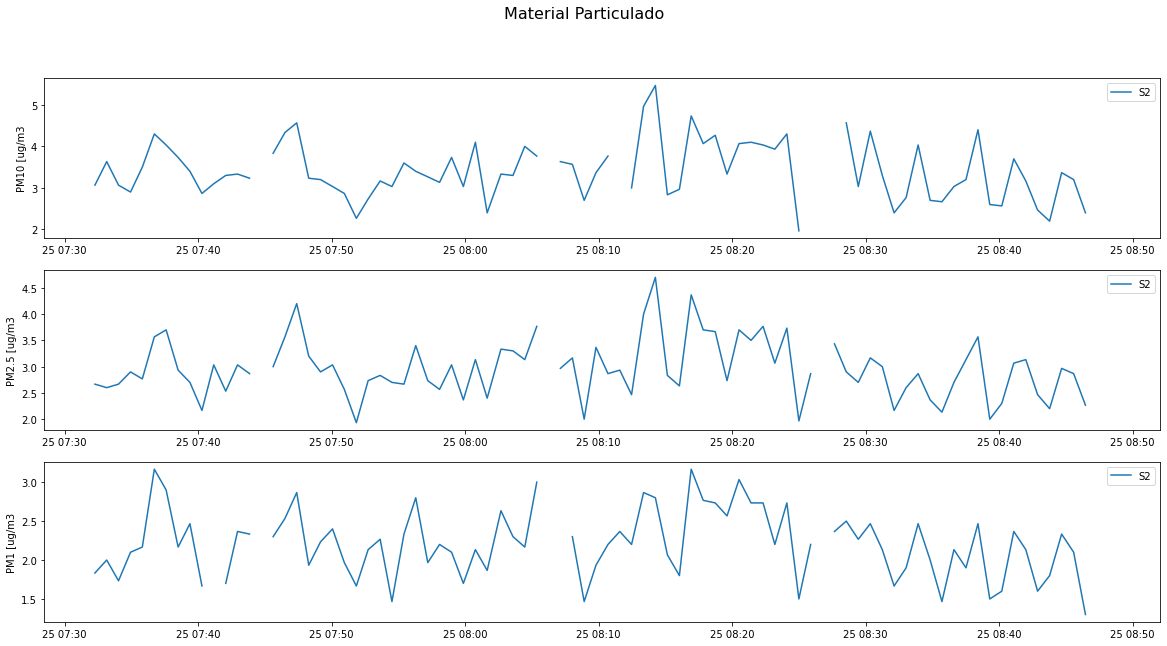

In [4]:
fig, axs = plt.subplots(3)
fig.set_size_inches(20,10)
fig.suptitle('Material Particulado', fontsize=16)

axs[0].plot(outdoor["pm10_0_au"], label = 'S2')
axs[0].set( ylabel='PM10 [ug/m3')
axs[0].legend(fontsize = 10)
#axs[0].set_title('PM10')

axs[1].plot(outdoor["pm2_5_au"], label = 'S2')
axs[1].set( ylabel='PM2.5 [ug/m3')
axs[1].legend(fontsize = 10)
#axs[1].set_title('PM2.5')

axs[2].plot(outdoor["pm1_0_au"], label = 'S2')
axs[2].set(ylabel='PM1 [ug/m3')
axs[2].legend(fontsize = 10)
#axs[2].set_title('PM1')


**Notas:**
* La fecha de los archivos, congig.yaml, se le agrego un +00:00 referente a la zona horaria, para que el datatime funcionara.
* Hace falta una forma de ver la documentacipon de forma rapida en donde se muestre a que corresponde cada columna.
* La estación permacio tomando datos desde el día 25/11/2020 más o menos desde las 7:30 pm hasta el día 27 más o menos a las 6:00 pm